# context

#### bollywood cinema has exploded recently due to streaming services such as Netflix, Amazon Prime, and Youtube offering Hindi movies for free or as part of their monthly subscription plans. As a result, movies have become much more popular in the Western World. However, I wanted to understand the intra-Indian trends of Bollywood cinema over the past ten years or so

# content

#### In this dataset, you will find 1698 Bollywood movies filmed in the Hindi language that was released all across the Indian subcontinent from a thirteen-year period during the years 2005-2017.

In [1]:
# First importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('d:/BollywoodMoviesData.csv')
df

,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Revenue(INR),Budget(INR)
0,Golden Boys,Normal,No,No,suspense,Yes,No,No,Jeet Goswami,Ravi Varma,Baba Jagirdar,5,5000000,85000
1,Kaccha Limboo,Holiday,No,No,drama,Yes,No,Yes,Karan Bhanushali,Sagar Ballary,Amardeep Nijjer,75,15000000,825000
2,Not A Love Story,Holiday,No,No,thriller,No,No,No,Mahie Gill,Ram Gopal Verma,Sandeep Chowta,525,75000000,56700000
3,Qaidi Band,Holiday,No,No,drama,Yes,No,No,Aadar Jain,Habib Faisal,Amit Trivedi,800,210000000,4500000
4,Chaatwali,Holiday,No,No,adult,Yes,Yes,Yes,Aadil Khan,Aadil Khan,Babloo Ustad,1,1000000,1075000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,Fight Club,Holiday,No,No,action,No,Yes,No,Zayed Khan,Vikram Chopra,Pritam,375,82500000,88862500
1694,Strings Of Paasion,Normal,No,No,drama,No,Yes,Yes,Zeenat Aman,Sanghamitra Chaudhuri,Dev Sikdar,10,8000000,70000
1695,Dunno Y Na Jaane Kyun,Normal,No,No,drama,No,No,No,Zeenat Aman,Sanjay Sharma,Nikhil,20,12500000,850000
1696,Taj Mahal - An Eternal Love Story,Normal,No,No,drama,No,Yes,No,Zulfi Sayed,Akbar Khan,Naushad,135,100000000,31065000


In [3]:
# checking for null values

df.isnull().sum()

Movie Name            0
Release Period        0
Whether Remake        0
Whether Franchise     0
Genre                 0
New Actor             0
New Director          0
New Music Director    0
Lead Star             0
Director              0
Music Director        0
Number of Screens     0
Revenue(INR)          0
Budget(INR)           0
dtype: int64

In [4]:
# columns of the dataset

df.columns

Index(['Movie Name', 'Release Period', 'Whether Remake', 'Whether Franchise',
       'Genre', 'New Actor', 'New Director', 'New Music Director', 'Lead Star',
       'Director', 'Music Director', 'Number of Screens', 'Revenue(INR)',
       'Budget(INR)'],
      dtype='object')

In [5]:
# now dropping the unnecessary columns

df=df.drop(['New Actor','New Director','New Music Director','Whether Franchise'],axis='columns')

In [6]:
# rename the columns if you want

df.rename(columns={'Whether Remake':'Remake?','Number of Screens':'Screens'},inplace=True)

In [7]:
# now the final columns are

df.columns

Index(['Movie Name', 'Release Period', 'Remake?', 'Genre', 'Lead Star',
       'Director', 'Music Director', 'Screens', 'Revenue(INR)', 'Budget(INR)'],
      dtype='object')

In [8]:
# let's see the unique values in Genre

genre=df.Genre.unique()

In [9]:
genre

array(['suspense', 'drama', 'thriller', 'adult', 'comedy', 'action',
       'love_story', 'rom__com', 'horror', 'fantasy', 'masala',
       'mythological', 'animation', 'documentary'], dtype=object)

<AxesSubplot:xlabel='Genre'>

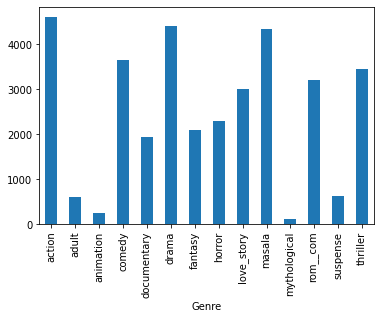

In [49]:
# here we can see that the action movies have the maximum no. of screens

df.groupby('Genre').max('Screens')['Screens'].plot.bar()

<AxesSubplot:xlabel='Genre', ylabel='count'>

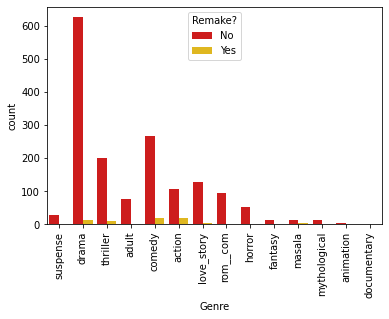

In [50]:
# and more movies were released of drama genre

plt.xticks(rotation=90)
sns.countplot(x='Genre',data=df,hue='Remake?',palette='hot')

In [51]:
# top 10 movies with high revenue

df.sort_values('Revenue(INR)',ascending=False)[['Movie Name','Revenue(INR)']][:10]

,Movie Name,Revenue(INR)
1240,Tiger Zinda Hai,2100000000
947,Bahubali 2 - The Conclusion,1950000000
1260,Prem Ratan Dhan Payo,1800000000
17,Dhoom 3,1750000000
946,Bahubali - The Beginning,1700000000
1379,Dilwale,1650000000
568,Bang Bang,1600000000
1370,Happy New Year,1500000000
1132,Bajirao Mastani,1450000000
1239,Sultan,1450000000


In [52]:
# top 10 movies with high budget
df.sort_values('Budget(INR)',ascending=False)[['Movie Name','Budget(INR)']][0:10]

,Movie Name,Budget(INR)
947,Bahubali 2 - The Conclusion,8016120000
12,Dangal,7024750000
14,PK,6160362500
1248,Bajrangi Bhaijaan,6039940000
1239,Sultan,5772875000
1240,Tiger Zinda Hai,5651020000
17,Dhoom 3,5243760000
1378,Chennai Express,3959242500
1379,Dilwale,3722315000
1260,Prem Ratan Dhan Payo,3654575000


<AxesSubplot:xlabel='Remake?', ylabel='count'>

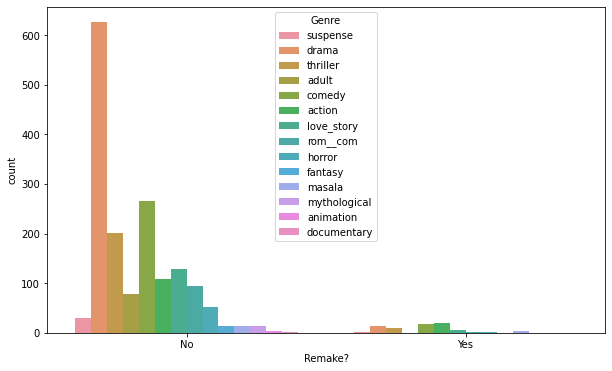

In [53]:
# there is not more remakes and the highest remake is having action movies

plt.figure(figsize=(10,6))
sns.countplot(x='Remake?',data=df,hue='Genre')

In [54]:
# remake movies with lead actors

df.loc[df['Remake?']=='Yes'][['Movie Name','Lead Star']]

,Movie Name,Lead Star
8,Ghajini,Aamir Khan
39,Players,Abhishek Bachchan
40,Game,Abhishek Bachchan
44,Raavan,Abhishek Bachchan
71,Aashiqui 2,Aditya Roy Kapoor
...,...,...
1511,Khichdi The Movie,Supriya Pathak
1565,Heropanti,Tiger Shroff
1578,Dhol,Tusshar Kapoor
1620,Begum Jaan,Vidya Balan


In [55]:
# lead star with highest number of screen 

df.loc[df['Screens'].argmax(),['Movie Name','Screens','Lead Star']]

Movie Name    Tiger Zinda Hai
Screens                  4600
Lead Star         Salman Khan
Name: 1240, dtype: object

In [56]:
# now grouping by lead star

d=df.groupby('Lead Star')
d.first()

,Movie Name,Release Period,Remake?,Genre,Director,Music Director,Screens,Revenue(INR),Budget(INR)
Lead Star,,,,,,,,,
Aadar Jain,Qaidi Band,Holiday,No,drama,Habib Faisal,Amit Trivedi,800,210000000,4500000
Aadil Khan,Chaatwali,Holiday,No,adult,Aadil Khan,Babloo Ustad,1,1000000,1075000
Aakar Kaushik,Shuttlecock Boys,Normal,No,comedy,Hemant Gaba,Avinash Baghel,10,5000000,170000
Aakash,Dirty Marriage,Holiday,No,adult,Priyanka,Dharma,2,1500000,35000
Aamir Bashir,Future To Bright Hai Ji,Holiday,No,drama,Sanjay Amar,Amir Ali,30,15000000,825000
...,...,...,...,...,...,...,...,...,...
Zakir Hussain,Satrangee Parachute,Holiday,No,drama,Vineet Khetrapal,Shamir Tandon,150,20000000,1225000
Zarine Khan,Aksar 2,Normal,No,thriller,Anant Mahadevan,Mithoon,1300,90000000,63600000
Zayed Khan,Sharafat Gayi Tel Lene,Normal,No,comedy,Gurmmeet Singh,Faridkot,450,70000000,5700000


In [57]:
# unique lead star

actors=(df['Lead Star'].unique())

In [25]:
actors

array(['Jeet Goswami', 'Karan Bhanushali', 'Mahie Gill', 'Aadar Jain',
       'Aadil Khan', 'Aakar Kaushik', 'Aakash', 'Aamir Bashir',
       'Aamir Khan', 'Aanamika Bawa', 'Aarun Nagar', 'Aaryan',
       'Aasad Mirza', 'Aashish Chanana', 'Aashish Chaudhary',
       'Aasif Albela', 'Aatri Kumar', 'Abhay Bakshi', 'Abhay Deol',
       'Abhijeet Sawant', 'Abhinav Shukla', 'Abhishek Anand',
       'Abhishek Bachchan', 'Abhishek Gupta', 'Abhishek Sharma',
       'Abhishek Urade', 'Adah Sharma', 'Adam Bedi', 'Adhvik Mahajan',
       'Adhyayan Suman', 'Adil Hussain', 'Aditi Inamdar', 'Aditi Sharma',
       'Aditya Narayan', 'Aditya Om', 'Aditya Roy Kapoor',
       'Aditya Samanta', 'Aditya Shrivastava', 'Affi Khan', 'Afsar Khan',
       'Aftab Shivdasani', 'Ahsaas Channa', 'Aishwarya Rai', 'Ajay Devgn',
       'Ajay Jadeja', 'Ajay Kumar', 'Ajay Shukla', 'Ajay Sinh Rathod',
       'Ajay Soni', 'Ajaz Khan', 'Akanksha Puri', 'Akash', 'Akbar Khan',
       'Akshay Kapoor', 'Akshay Kumar', 'Akshay 

In [69]:
# now you just have to enter the name of your favourite lead star from the above lead_star list

# and you can get his all data


while True:
    x=int(input('Please enter 1 if you want to search else enter 0 to exit'))
    if x==1:
        y=input('Enter the Lead Star name')
        if y in actors:
            print(d.get_group(y))
            break
        else:
            print('Not found')
    else:
        break


Please enter 1 if you want to search else enter 0 to exit1
Enter the Lead Star nameBobby Deol
                Movie Name Release Period Remake?       Genre   Lead Star  \
365  Humko Tumse Pyaar Hai        Holiday      No  love_story  Bobby Deol   
366                 Chamku         Normal      No      action  Bobby Deol   
367                   Help        Holiday      No      horror  Bobby Deol   
368        Nanhe Jaisalmer        Holiday      No       drama  Bobby Deol   
369          Vaada Raha...         Normal      No       drama  Bobby Deol   
370  Ek - The Power Of One        Holiday      No      action  Bobby Deol   
371                Barsaat        Holiday      No  love_story  Bobby Deol   
372   Shaka Laka Boom Boom        Holiday      No       drama  Bobby Deol   
373                   Jurm        Holiday      No    thriller  Bobby Deol   

           Director     Music Director  Screens  Revenue(INR)  Budget(INR)  
365    Bunty Soorma    Anand Raj Anand      140      75000

In [70]:
df1=pd.DataFrame(d.get_group(y))
df1        

,Movie Name,Release Period,Remake?,Genre,Lead Star,Director,Music Director,Screens,Revenue(INR),Budget(INR)
365,Humko Tumse Pyaar Hai,Holiday,No,love_story,Bobby Deol,Bunty Soorma,Anand Raj Anand,140,75000000,43280000
366,Chamku,Normal,No,action,Bobby Deol,Kabeer Kaushik,Monty Sharma,425,100000000,30967500
367,Help,Holiday,No,horror,Bobby Deol,Rajeev Virani,Gourov Dasgupta,575,80000000,30900000
368,Nanhe Jaisalmer,Holiday,No,drama,Bobby Deol,Samir Karnik,Himesh Reshammiya,125,55000000,6996000
369,Vaada Raha...,Normal,No,drama,Bobby Deol,Samir Karnik,Babbu Mann,275,60000000,11000000
370,Ek - The Power Of One,Holiday,No,action,Bobby Deol,Sangeeth Sivan,Pritam,650,210000000,91500000
371,Barsaat,Holiday,No,love_story,Bobby Deol,Suneel Darshan,Nadeem - Shravan,375,100000000,195600000
372,Shaka Laka Boom Boom,Holiday,No,drama,Bobby Deol,Suneel Darshan,Himesh Reshammiya,425,115000000,95900000
373,Jurm,Holiday,No,thriller,Bobby Deol,Vikram Bhatt,Anu Malik,275,90000000,61400000


<AxesSubplot:xlabel='Movie Name', ylabel='Revenue(INR)'>

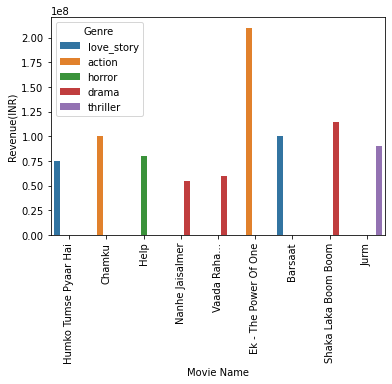

In [72]:
# now there is the chart of your selected lead star
# between movie name and revenue
# with genre

plt.xticks(rotation=90)
sns.barplot(x='Movie Name',y='Revenue(INR)',hue='Genre',data=df1)

<AxesSubplot:xlabel='Movie Name', ylabel='Screens'>

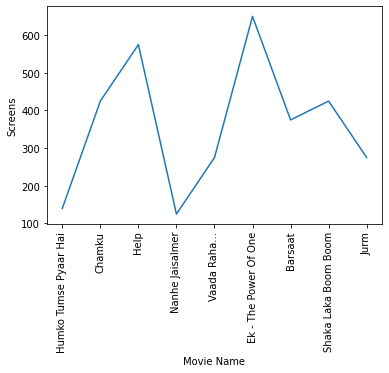

In [74]:
# here it is between 
# movie name and number of screens


plt.xticks(rotation=90)
sns.lineplot(x='Movie Name',y='Screens',data=df1)

In [77]:
# movies of that lead star only with high revenue

high_revenue=d.get_group(y)
# high_revenue
high_revenue.loc[high_revenue['Revenue(INR)']>high_revenue['Budget(INR)']]['Movie Name']

365    Humko Tumse Pyaar Hai
366                   Chamku
367                     Help
368          Nanhe Jaisalmer
369            Vaada Raha...
370    Ek - The Power Of One
372     Shaka Laka Boom Boom
373                     Jurm
Name: Movie Name, dtype: object

In [78]:
# grouping by music director

df.groupby('Music Director').max('Screens')['Screens']

Music Director
 Amit Trivedi         1150
 Clinton Cerejo       1250
 Pritam               2850
 Ram Shankar          1450
 Rohit Kulkarni        725
                      ... 
Yuvan Shankar Raja    1950
Zakir Hussain           35
Zubeen Garg              6
Zubin Balaporia         65
Zubunnisa Bangash      500
Name: Screens, Length: 630, dtype: int64